    ***Dissecting Ted***
    **Computational Analysis of Big Data Final Project**
    *Jack Mazanec, Morgan Hogenmiller, Valerie Huang*

**Overview**

Outline the data source, what questions we will be answering, and any other relevant information

**Actual Code**

Format Data

In [3]:
from afinn import Afinn
from matplotlib import pyplot as plt

# this is an example on sentiment analysis
afinn = Afinn(emoticons=True)
afinn.score('This is utterly excellent!')

3.0

In [4]:
import pandas as pd

# read in the two csv files
ted_main = pd.read_csv('data/ted_main.csv')
scripts = pd.read_csv('data/transcripts.csv')

# get the column "transcripts" from transcripts.csv
# print how many talks
transcripts = scripts["transcript"]
length = len(transcripts)
print "There are " + str(length) + " talks"

# get list of the senti-scores of first ten talks based on transcripts
scores=[]
for i in range(0, 10):
    talk_score=afinn.score(transcripts[i])
    scores.append(talk_score)
print scores

There are 2467 talks
[163.0, 91.0, 139.0, 130.0, 93.0, 160.0, 119.0, 38.0, 240.0, 184.0]


In [5]:
import datetime

unix_film_dates = ted_main["film_date"]
unix_publish_dates = ted_main["published_date"]

# get list of the readable filmed dates of first ten talks based on unix timestamp
filmDate=[]
for i in range(0, 10):
    real_filmdate=datetime.datetime.fromtimestamp(int(unix_film_dates[i])).strftime('%Y-%m-%d')
    filmDate.append(real_filmdate)
print filmDate

# get list of the readable published dates of first ten talks based on unix timestamp
publishDate=[]
for i in range(0, 10):
    real_publishdate=datetime.datetime.fromtimestamp(int(unix_publish_dates[i])).strftime('%Y-%m-%d')
    publishDate.append(real_publishdate)
print publishDate


['2006-02-25', '2006-02-25', '2006-02-24', '2006-02-26', '2006-02-22', '2006-02-02', '2006-02-24', '2006-02-23', '2006-02-02', '2006-02-25']
['2006-06-27', '2006-06-27', '2006-06-27', '2006-06-27', '2006-06-27', '2006-06-27', '2006-07-10', '2006-07-10', '2006-07-18', '2006-07-18']


Is there a trend in sentinement of talks throughout the talks duration/ Are Ted talks always positive

Is there a trend in sentiment for specific topics over years?

 What topics are talked about most each year?

What’re the most common words in Ted talks? (word clouds)

**What tags generate the most views?**

In this section, we wanted to analyze which tags generally garner the most views. To do this, for each tag, we sum up the amount of views each talk that contains the tag has. Then, we get the average by dividing by the number of talks that use that tag. We print out the 10 highest averages and the corresponding tags and then create a histogram.

In [3]:
## Imports for the whole section
import pandas as pd
from matplotlib import pyplot as plt
import json
import networkx as nx

In [4]:
## Read in data about tags
ted_main = pd.read_csv('data/ted_main.csv')
tags_deets = dict() # Dictionary containing tags as keys and total views, frequency tag is used as values

## Get all tags and their views and freq
# Loop through each talk and get/set tags data
for i in range(len(ted_main)):
    views = int(ted_main['views'][i]) # total views for that talk
    string_tags = [t.strip() for t in ted_main['tags'][i].strip().lower().replace("'", "")[1:-1].split(',')] # Array of tags for that talk
    for tag in string_tags:
        if tag not in tags_deets:
            tags_deets[tag] = {'views':0, 'freq':0, 'avg':0}
        # Set values for that tag
        tags_deets[tag]['views'] += views
        tags_deets[tag]['freq'] += 1

## Get average values for all tags *regardless of frequency*
tag_avg = {k:tags_deets[k]['views']/float(tags_deets[k]['freq']) for k in tags_deets.keys()}        

In [5]:
## Get top 10 averages of all keys
top_views = list()
for key, value in sorted(tag_avg.iteritems(), key=lambda (k,v): (v,k)):
    top_views.append([key, value])
top_views.reverse()
## Print out results
print "Tags with highest average views\n"
for i, (key, value) in enumerate(top_views):
    if i > 9: break
    print str(i+1) + ".) " + key + ": " + str(round(value, 2))

Tags with highest average views

1.) body language: 7993455.09
2.) testing: 6657858.0
3.) success: 6454556.61
4.) introvert: 6303975.6
5.) mindfulness: 4335876.6
6.) evil: 4283967.0
7.) dance: 4122717.16
8.) productivity: 4048263.35
9.) addiction: 4033930.2
10.) magic: 4021694.06


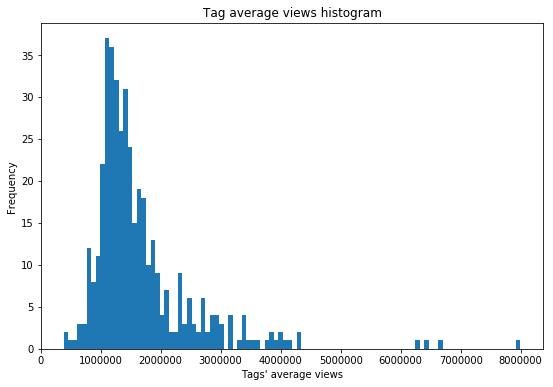

In [6]:
## Create histogram for the data
top_view_values = [top_views[i][1] for i in range(len(top_views))]
plt.figure(figsize=(9, 6))
plt.hist(top_view_values, 100)
plt.xlabel("Tags' average views")
plt.ylabel("Frequency")
plt.title("Tag average views histogram")
plt.show()

As can be seen in the histogram, the distribution is skewed right. Most tags have an average views in between 500,000 and 2,500,000. There are some outliers that have significantly more than this.

Next, we wanted to see if the distribution would be different if we required that, to be included in the distribution, a tag needed to be used in at least 5 talks.

In [7]:
## Filter for tags that have a minimum of 5 different speeches
top_views_filtered = list()
filter_value = 5
for key, value in top_views:
    if tags_deets[key]['freq'] < filter_value: continue
    top_views_filtered.append([key, value])
## Print out results
print "Tags with highest average views with at least " + str(filter_value) + " tag instances\n"
for i, (key, value) in enumerate(top_views_filtered):
    if i > 9: break
    print str(i+1) + ".) " + key + ": " + str(round(value, 2))

Tags with highest average views with at least 5 tag instances

1.) body language: 7993455.09
2.) success: 6454556.61
3.) introvert: 6303975.6
4.) mindfulness: 4335876.6
5.) dance: 4122717.16
6.) productivity: 4048263.35
7.) addiction: 4033930.2
8.) magic: 4021694.06
9.) time: 3893878.59
10.) work-life balance: 3873959.5


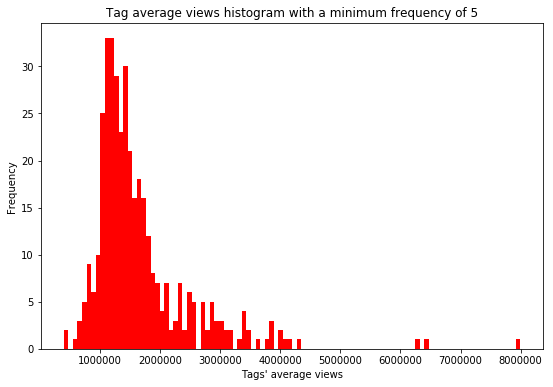

In [8]:
## Create another histogram
top_view_values_filtered = [top_views_filtered[i][1] for i in range(len(top_views_filtered))]
plt.figure(figsize=(9, 6))
plt.hist(top_view_values_filtered, 100, color="red")
plt.xlabel("Tags' average views")
plt.ylabel("Frequency")
plt.title("Tag average views histogram with a minimum frequency of " + str(filter_value))
plt.show()

As can be seen, a few tags are removed from the top 10, but the overall distribution looks very similar to the distribution in the earlier histogram.

Next, we wanted to see how tags are connected together. To do this, we created a graph where each node is a tag and the edges are connections between the tags that have been used in the same talk.

Graph quick statistics
    Total nodes: 416
    Total edges: 22149
    Avg edge/node: 53.24


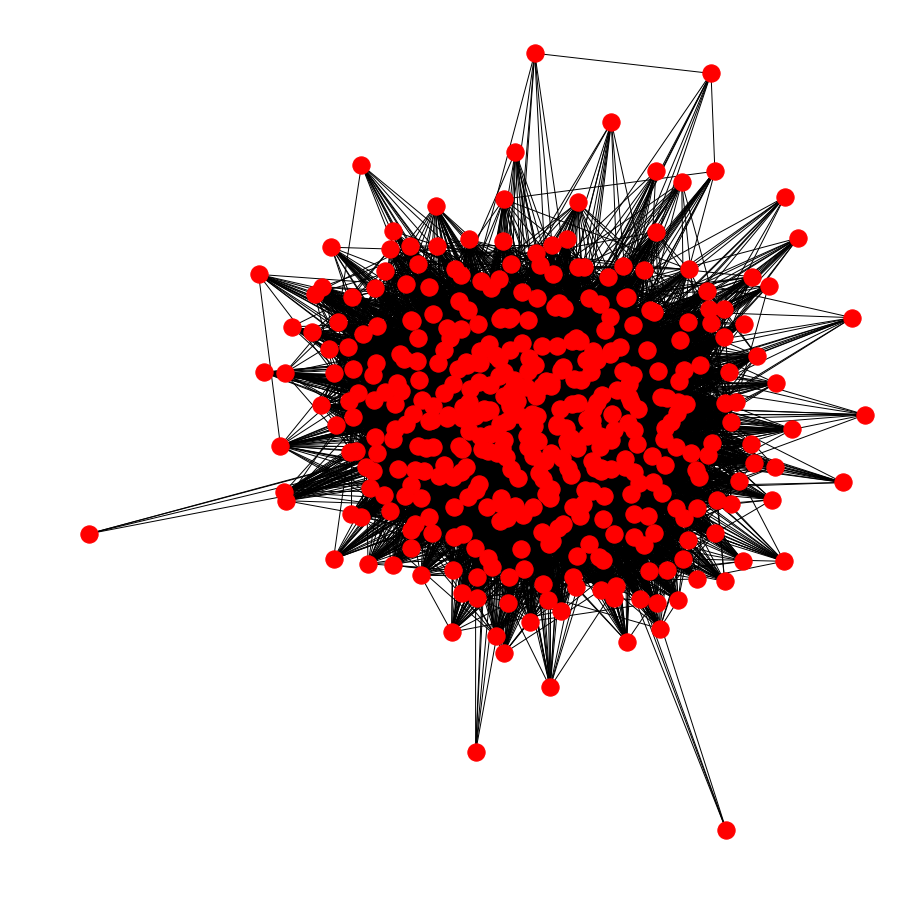

In [9]:
## Create network connecting tags
# an individual tag will be the nodes
# the edges will connect nodes if they appear in the same talk
tag_graph = nx.Graph()
# Make all nodes and then add edges
for i in range(len(ted_main)):
    # Properly format all tags from that talk into an array
    string_tags = [t.strip() for t in ted_main['tags'][i].strip().lower().replace("'", "")[1:-1].split(',')] # Array of tags for that talk
    # Add all tags as nodes to the graph
    tag_graph.add_nodes_from(string_tags)
    # Add edges for each tag to every other tag in that group
    for tag in string_tags:
        edges = [(tag, t) for t in string_tags if t != tag]
        tag_graph.add_edges_from(edges)
# Print stats about graph
print "Graph quick statistics"
print "    Total nodes: " + str(len(tag_graph.nodes))
print "    Total edges: " + str(len(tag_graph.edges))
print "    Avg edge/node: " + str(round(float(len(tag_graph.edges))/len(tag_graph.nodes), 2))

# Plot graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(tag_graph)
nx.draw(tag_graph, pos=pos)
plt.show()

In [10]:
## Print most connected tags out
top = 10
new_graph = list(reversed(sorted([(v,t) for t,v in nx.degree(tag_graph)])))
print "Most connected tags\n"
for i in range(top):
    print str(i+1) + ".) " + new_graph[i][1] + ": " + str(new_graph[i][0])

Most connected tags

1.) technology: 370
2.) tedx: 365
3.) science: 354
4.) innovation: 335
5.) global issues: 335
6.) society: 316
7.) culture: 316
8.) collaboration: 312
9.) future: 311
10.) humanity: 305


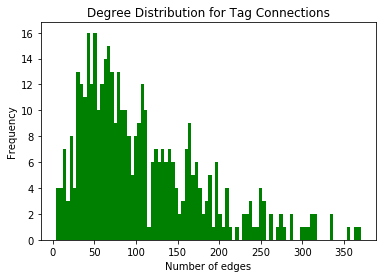

In [11]:
## Print out distribution of edges for hub detection
connections = [t[1] for t in nx.degree(tag_graph)]
plt.hist(connections, 90, color="green")
plt.title("Degree Distribution for Tag Connections")
plt.ylabel("Frequency")
plt.xlabel("Number of edges")
plt.show()

As can be seen from this histogram and the earlier printed out statistics, there are some tags that are significantly more connected than the average tag. From looking at the top 10, these tags are very general. For instance, the top most connected tag is technology.

**Is there a formula for getting the most views?**

In this section, we wanted to build a model that would take a description of a talk and predict how many views it would get. To do this, we created a bag of words matrix from all the existing descriptions and used Lasso regression to create the model. Lasso regression is a regression analysis model that selects variables and performs regularization to maximize prediction accuracy.

In [16]:
import nltk
import pandas as pd
import numpy as np
# First get a list of all words in all descriptions that aren't stop words
stopwords = nltk.corpus.stopwords.words('english') 
ted_main = pd.read_csv('data/ted_main.csv')
all_words = set()
for i in range(len(ted_main)):
    talk_descript = [x for x in ted_main['description'][i].replace('(', '').replace(')', '').split(' ') if x != '']
    for word in talk_descript:
        if word.decode('utf-8') in stopwords:
            continue
        else:
            all_words.add(word)
# Convert to list
all_words = list(all_words)

In [17]:
# Construct np array to keep track of bag of words
views = list()
bag_of_words = np.zeros([len(ted_main), len(all_words)]) # last column is the views
# Loop through each speech and add up the words and get the views
for i in range(len(ted_main)):
    views.append(ted_main['views'][i])
    talk_descript = [x for x in ted_main['description'][i].replace('(', '').replace(')', '').split(' ') if x != '']
    for j, word in enumerate(all_words):
        bag_of_words[i][j] = talk_descript.count(word)

In [18]:
from sklearn import linear_model
# Do a Lasso regression with number of views
clf = linear_model.Lasso(alpha=0.1)
c = clf.fit(bag_of_words, views)

In [19]:
# Allow for input from user
t = raw_input('Enter a description for your talk: ').rstrip().replace('(', '').replace(')', '').split(' ')
X = [list()]
for j, word in enumerate(all_words):
    X[0].append(t.count(word))
print "A talk with this description would get an estimated " + str(int(clf.predict(X))) + " views!"

Enter a description for your talk: the talk will be awesome
A talk with this description would get an estimated 1838751 views!


** Recommender System **

In this section, we wanted to create a simple recommendation system where users could get suggested talks based on what talks they have liked, what topics they want to hear and what other people have thought about the talks. The list of recommendations is in a python dictionary that is used as a priority queue. Each title has 3 values. The first corresponds to whether or not the listener has liked or disliked a speech that is related to that speech and what tags the user has indicicated that they want to listen to. The second column is a summation of the ratings sentiment scores. Using the python sort method, we are able to sort based first on the first column, and then on the second column.

In [21]:
#!/usr/bin/env python2.7
import pandas as pd
import ast # converts string to dict
from afinn import Afinn # Sentiment score
import sys
'''
How we're going to rate recommendations:
1. Likes and dislikes on similar talks ~ everyone starts out with 0
2. get sentiment score on each rating and multiply it by the number of ratings
Keep track of speeches that have already been recommended and change ratings 
based on ratings of similar talks
'''

## Initialize dictionary for all talks
# Reads in all talks and scores their ratings
def init():
    ## Get tags user may want to listen to before
    user_tags = raw_input("Enter tags to describe the kinds of speeches you want to listen to: ").rstrip().lower().split(' ')
    ## Read in data about tags
    ted_main = pd.read_csv('data/ted_main.csv')
    pq = dict()
    afinn = Afinn()
    ## Get all tags and their views and freq
    # Loop through each talk and get/set tags data
    for i in range(len(ted_main)):
        ratings =  ast.literal_eval(ted_main['ratings'][i])
        title = ted_main['title'][i]
        # Add user input to the order
        t_score = 0
        for t in user_tags:
            if t in ted_main['tags'][i]:
                t_score += 1
        # Get the sentiment score for all the ratings and multiply it by the number of times its said
        r_score = 0
        for rating in ratings:
            r_score += afinn.score(rating['name']) * rating['count']
        pq[title] = [t_score, r_score, 0]
    return pq

## Converts the dictionary of talks into a sorted list of just the titles
def get_list(pq_dict):
    pq = list()
    for key in pq_dict:
        pq.append([pq_dict[key][0], pq_dict[key][1], key])
    pq.sort(reverse=True)
    return [p[2] for p in pq]

## Set up dictionary of related talks
def set_related_talks():
    ## Read in data about tags
    ted_main = pd.read_csv('data/ted_main.csv')
    related_talks = dict()
    ## Get all tags and their views and freq
    # Loop through each talk and get/set tags data
    for i in range(len(ted_main)):  
        titles = [talk['title'] for talk in ast.literal_eval(ted_main['related_talks'][i])]
        related_talks[ted_main['title'][i]] = titles
    return related_talks

## Main execution block
def main():
    ## Init the priority queue, it'll come sorted
    pq_talks = init()
    related_talks = set_related_talks()
    pq_list = get_list(pq_talks)
    ## Read input
    # Continue to loop until everything is gone
    while True:
        while True:
            print "Enter 0 for the next rec\nEnter 1 to rate a Ted talk"
            inp = input()
            if inp == 0 or inp == 1:
                break
        # React to users choice
        if inp == 0:
            # Find first recommendation that hasnt already been rec'd
            index = 0
            for i in range(len(pq_talks)):
                if pq_talks[pq_list[i]][2] == 0:
                    index = i
                    break
            print "We recommend you listen to '" + pq_list[index] + "'"
            # Mark title as recommended
            pq_talks[pq_list[index]][2] = 1
            # Get user feedback
            while True:
                print "Do you want to listen to this? Enter 1 for yes, Enter -1 for no"
                rating = input()
                if rating == -1 or rating == 1:
                    break
            # Update that talks rating
            pq_talks[pq_list[index]][0] += rating
            # Now update rating for all of its related talks
            for talk in related_talks[pq_list[index]]:
                pq_talks[talk][0] += rating
        else:
            # Get rating for a speech the user already listened to
            print "Enter the title of the talk:"
            talk = raw_input().rstrip()
            # Validity check
            while talk not in pq_talks:
                print "Talk not found"
                talk = raw_input().rstrip()
            print "Did you like it? Enter 1 for yes, Enter -1 for no"
            rating = input()
            while rating != -1 and rating != 1:
                print "Error try again"
                rating = input()
            # Update rating and mark as listened to
            pq_talks[talk][2] = 1
            pq_talks[talk][0] += rating
            # Now flag all of its related talks here
            for t in related_talks[talk]:
                pq_talks[t][0] += rating
        # Reset list with updated information
        pq_list = get_list(pq_talks)

if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        pass

Enter tags to describe the kinds of speeches you want to listen to: Music
Enter 0 for the next rec
Enter 1 to rate a Ted talk
0
We recommend you listen to 'The transformative power of classical music'
Do you want to listen to this? Enter 1 for yes, Enter -1 for no
